In [1]:
# load standard libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [2]:
raw_data = pd.read_pickle('raw_data.pkl')


In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=15)

In [4]:
df_police = train_set.copy()

In [5]:
def seasonal_data(df):
    spring = df[(df['month'] == 3) | (df['month'] == 4) | (df['month'] == 5)]
    summer = df[(df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8)]
    fall = df[(df['month'] == 9) | (df['month'] == 10) | (df['month'] == 11)]
    winter = df[(df['month'] == 12) | (df['month'] == 1) | (df['month'] == 2)]
    return spring, summer, fall, winter

def locational_data(df, x='Longitude', y='Latitude'):
    return df[[x, y]]

def monthly_data(df):
    january = df[(df['month'] == 1)]
    february = df[(df['month'] == 2)]
    march = df[(df['month'] == 3)]
    april = df[(df['month'] == 4)]
    may = df[(df['month'] == 5)]
    june = df[(df['month'] == 6)]
    july = df[(df['month'] == 7)]
    august = df[(df['month'] == 8)]
    september = df[(df['month'] == 9)]
    october = df[(df['month'] == 10)]
    november = df[(df['month'] == 11)]
    december = df[(df['month'] == 12)]
    return january, february, march, april, may, june, july, august, september, october, november, december

In [6]:
january, february, march, april, may, june, july, august, september, october, november, december = monthly_data(df_police)

In [7]:
jan_loc = locational_data(january)
feb_loc = locational_data(february)
mar_loc = locational_data(march)
apr_loc = locational_data(april)
may_loc = locational_data(may)
jun_loc = locational_data(june)
jul_loc = locational_data(july)
aug_loc = locational_data(august)
sep_loc = locational_data(september)
oct_loc = locational_data(october)
nov_loc = locational_data(november)
dec_loc = locational_data(december)

In [8]:
jan_array = np.array(jan_loc)
feb_array = np.array(feb_loc)
mar_array = np.array(mar_loc)
apr_array = np.array(apr_loc)
may_array = np.array(may_loc)
jun_array = np.array(jun_loc)
jul_array = np.array(jul_loc)
aug_array = np.array(aug_loc)
sep_array = np.array(sep_loc)
oct_array = np.array(oct_loc)
nov_array = np.array(nov_loc)
dec_array = np.array(dec_loc)

In [9]:
def main_hotspot_grid(df, x1=-2.22, x2=-2.26, y1=53.46, y2=53.49):
    return df[(df['Latitude'] > 53.45) & (df['Latitude'] < 53.50) & (df['Longitude'] > -2.25) & (df['Longitude'] < -2.2)]

## January

In [10]:
print('The following holds for january')
hotspot = main_hotspot_grid(jan_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(jan_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(jan_loc)/len(hotspot))}')

The following holds for january
There are roughly 20376 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 199588 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 10


In [11]:
from k_means_constrained import KMeansConstrained

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
from k_means_constrained import KMeansConstrained
clf_jan = KMeansConstrained(
     n_clusters=15,
     size_min=None,
     size_max=20376,
     random_state=15,
     n_jobs=-1
)
clf_jan.fit_predict(jan_array)
print(clf_jan.cluster_centers_)
print(clf_jan.labels_)

In [16]:
jan_labels = clf_jan.labels_
jan_centers = clf_jan.cluster_centers_
np.save("jan_lbls.npy", jan_labels)
np.save("jan_cnts.npy", jan_centers)

In [17]:
janLabels = np.load("jan_lbls.npy")

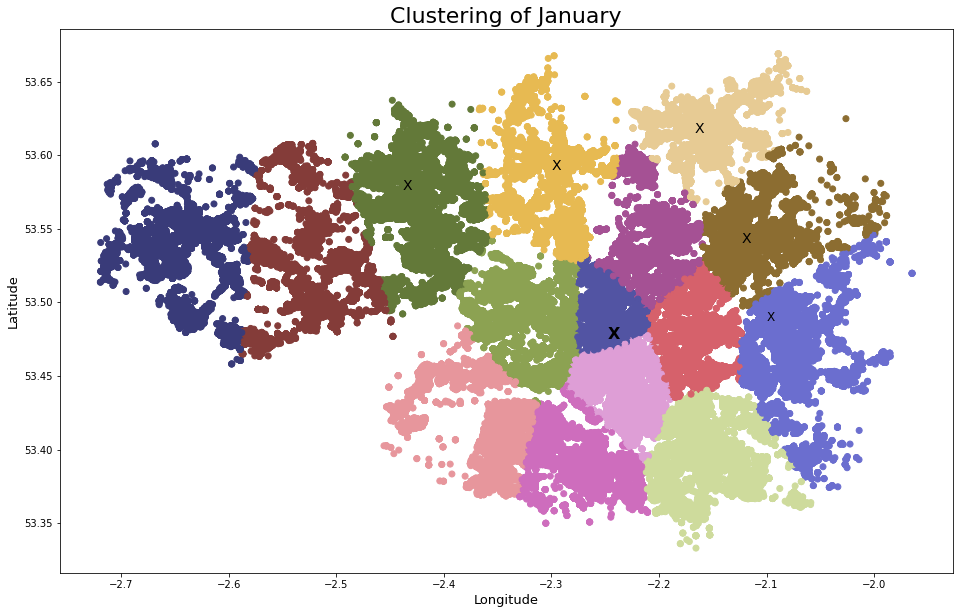

In [33]:
# plotting january clusters
fig, ax = plt.subplots()
ax.scatter(x=january.Longitude, y=january.Latitude, c=janLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of January', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of January.png')

plt.show()



## February

In [34]:
print('The following holds for February')
hotspot = main_hotspot_grid(feb_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(feb_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(feb_loc)/len(hotspot))}')

The following holds for February
There are roughly 20101 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 191069 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 10


In [37]:
clf_feb = KMeansConstrained(
     n_clusters=15,
     size_min=None,
     size_max=20101,
     random_state=15,
     n_jobs=-1
)
clf_feb.fit_predict(feb_array)

array([14,  9,  0, ...,  4,  1,  7])

In [38]:
feb_labels = clf_feb.labels_
feb_centers = clf_feb.cluster_centers_
np.save("feb_lbls.npy", feb_labels)
np.save("feb_cnts.npy", feb_centers)

In [39]:
febLabels = np.load("feb_lbls.npy")

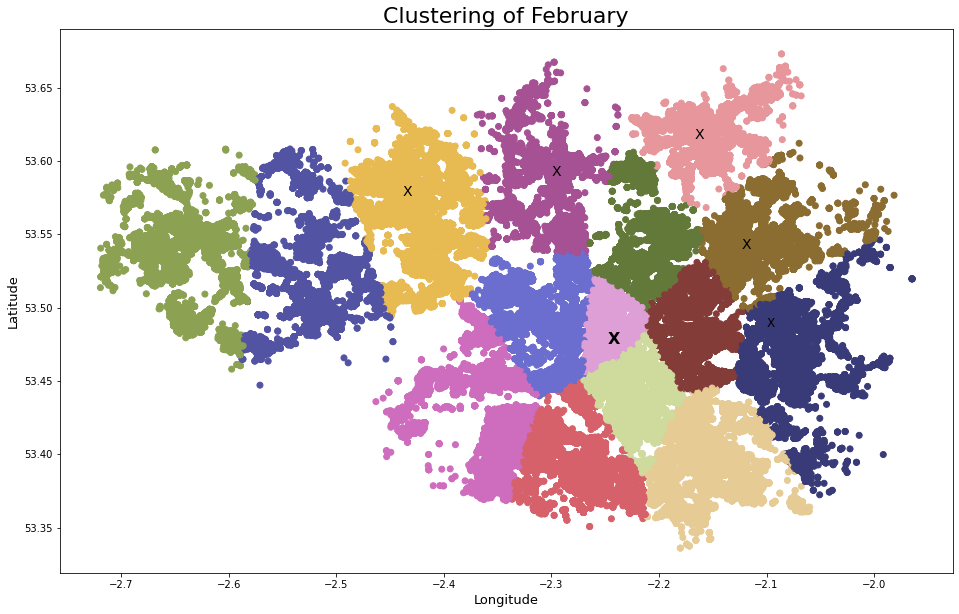

In [41]:
# plotting january clusters
fig, ax = plt.subplots()
ax.scatter(x=february.Longitude, y=february.Latitude, c=febLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of February', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of February.png')

plt.show()


## March

In [42]:
print('The following holds for March')
hotspot = main_hotspot_grid(mar_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(mar_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(mar_loc)/len(hotspot))}')

The following holds for March
There are roughly 22462 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 216065 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 10


In [43]:
clf_mar = KMeansConstrained(
     n_clusters=15,
     size_min=None,
     size_max=22462 ,
     random_state=15,
     n_jobs=-1
)
clf_mar.fit_predict(mar_array)

array([ 9,  2,  6, ...,  6,  0, 13])

In [44]:
mar_labels = clf_mar.labels_
mar_centers = clf_mar.cluster_centers_
np.save("mar_lbls.npy", mar_labels)
np.save("mar_cnts.npy", mar_centers)

In [45]:
marLabels = np.load("mar_lbls.npy")

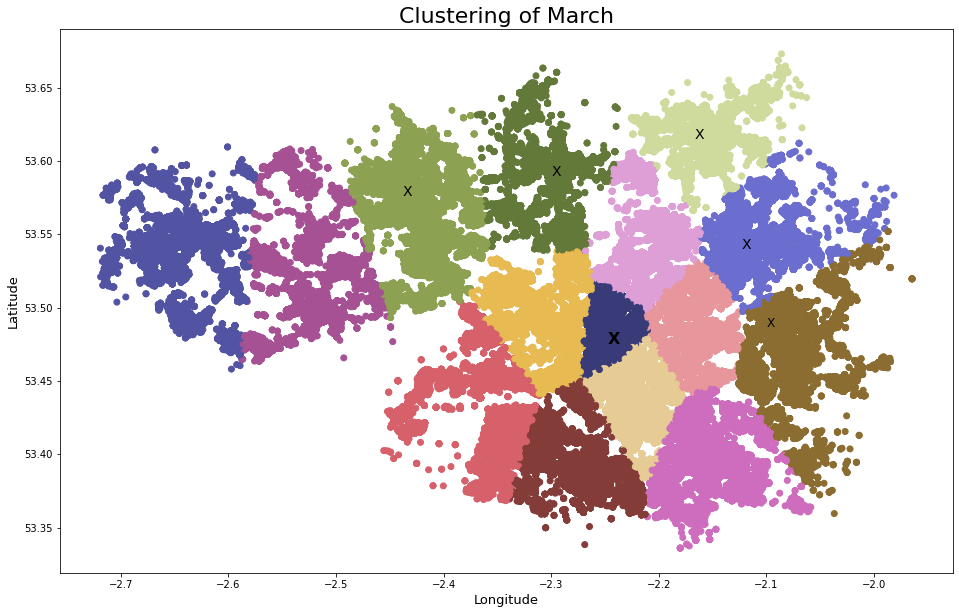

In [46]:
# plotting january clusters
fig, ax = plt.subplots()
ax.scatter(x=march.Longitude, y=march.Latitude, c=marLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of March', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of March.png')

plt.show()


## April

In [10]:
print('The following holds for April')
hotspot = main_hotspot_grid(apr_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(apr_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(apr_loc)/len(hotspot))}')

The following holds for April
There are roughly 20852 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 215303 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 11


In [15]:
clf_apr = KMeansConstrained(
     n_clusters=15,
     size_min=None,
     size_max=20852,
     random_state=15,
     n_jobs=-1
)
clf_apr.fit_predict(apr_array)

array([11,  3, 13, ...,  0,  6, 12])

In [16]:
apr_labels = clf_apr.labels_
apr_centers = clf_apr.cluster_centers_
np.save("apr_lbls.npy", apr_labels)
np.save("apr_cnts.npy", apr_centers)

In [17]:
aprLabels = np.load("apr_lbls.npy")

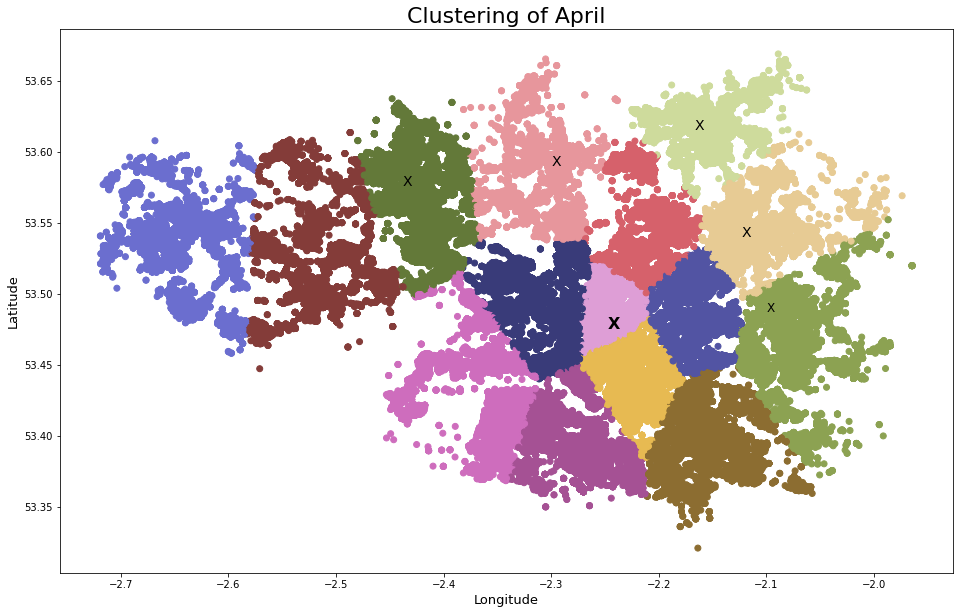

In [18]:
# plotting january clusters
fig, ax = plt.subplots()
ax.scatter(x=april.Longitude, y=april.Latitude, c=aprLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of April', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of April.png')

plt.show()


## May

In [19]:
print('The following holds for May')
hotspot = main_hotspot_grid(may_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(may_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(may_loc)/len(hotspot))}')

The following holds for May
There are roughly 21775 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 222138 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 11


In [20]:
clf_may = KMeansConstrained(
     n_clusters=15,
     size_min=None,
     size_max=21775 ,
     random_state=15,
     n_jobs=-1
)
clf_may.fit_predict(may_array)

array([ 1, 13, 13, ..., 10, 12, 10])

In [21]:
may_labels = clf_may.labels_
may_centers = clf_may.cluster_centers_
np.save("may_lbls.npy", may_labels)
np.save("may_cnts.npy", may_centers)

In [22]:
mayLabels = np.load("may_lbls.npy")

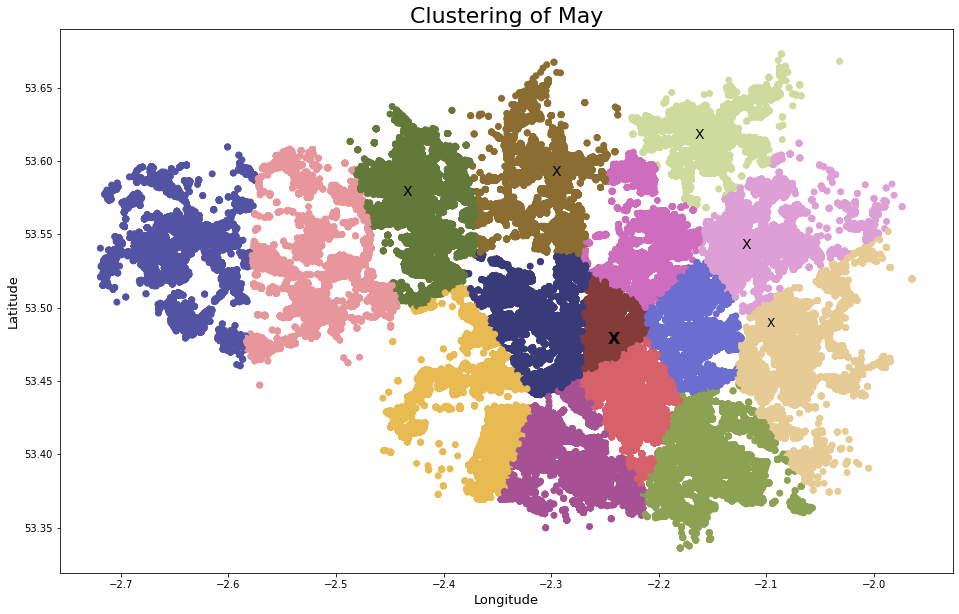

In [23]:
# plotting january clusters
fig, ax = plt.subplots()
ax.scatter(x=may.Longitude, y=may.Latitude, c=mayLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of May', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of May.png')

plt.show()


## June

In [10]:
print('The following holds for June')
hotspot = main_hotspot_grid(jun_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(jun_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(jun_loc)/len(hotspot))}')

The following holds for June
There are roughly 20862 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 219192 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 11


In [14]:
clf_jun = KMeansConstrained(
     n_clusters=15,
     size_min=None,
     size_max=20862 ,
     random_state=15,
     n_jobs=-1
)
clf_jun.fit_predict(jun_array)

array([5, 3, 5, ..., 4, 2, 1])

In [15]:
jun_labels = clf_jun.labels_
jun_centers = clf_jun.cluster_centers_
np.save("jun_lbls.npy", jun_labels)
np.save("jun_cnts.npy", jun_centers)

In [16]:
junLabels = np.load("jun_lbls.npy")

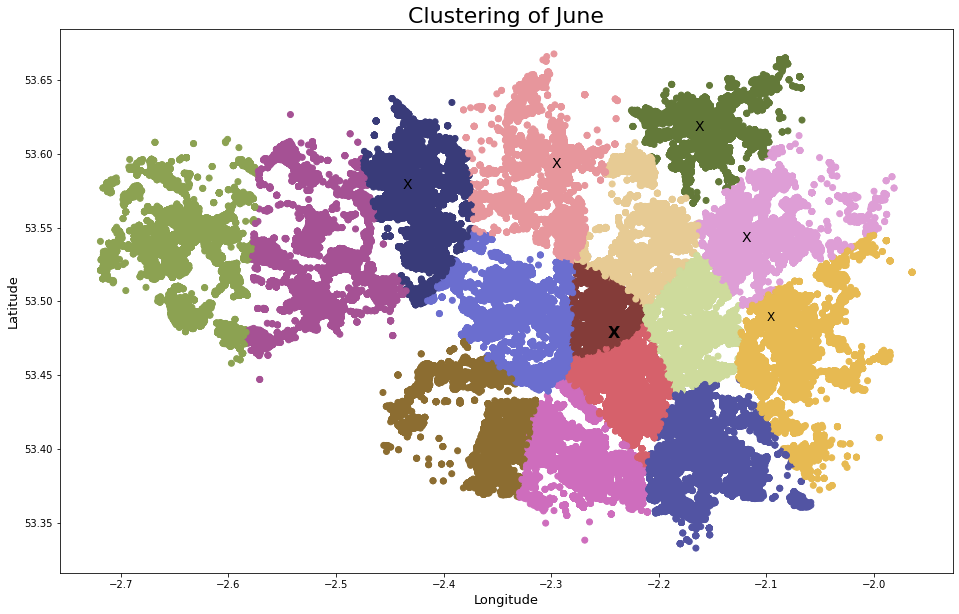

In [17]:
# plotting June clusters
fig, ax = plt.subplots()
ax.scatter(x=june.Longitude, y=june.Latitude, c=junLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of June', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of June.png')

plt.show()


## July

In [18]:
print('The following holds for July')
hotspot = main_hotspot_grid(jul_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(jul_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(jul_loc)/len(hotspot))}')

The following holds for July
There are roughly 19226 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 203369 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 11


In [19]:
clf_jul = KMeansConstrained(
     n_clusters=15,
     size_min=None,
     size_max=19226 ,
     random_state=15,
     n_jobs=-1
)
clf_jul.fit_predict(jul_array)

array([14,  5, 12, ...,  3, 13,  8])

In [20]:
jul_labels = clf_jul.labels_
jul_centers = clf_jul.cluster_centers_
np.save("jul_lbls.npy", jul_labels)
np.save("jul_cnts.npy", jul_centers)

In [21]:
julLabels = np.load("jul_lbls.npy")

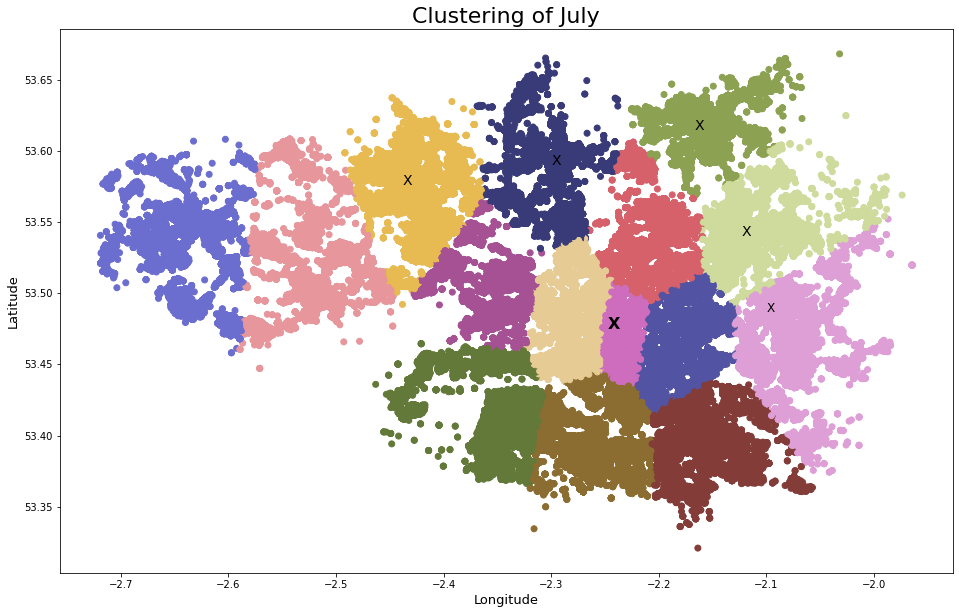

In [22]:
# plotting June clusters
fig, ax = plt.subplots()
ax.scatter(x=july.Longitude, y=july.Latitude, c=julLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of July', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of July.png')

plt.show()


## August

In [23]:
print('The following holds for August')
hotspot = main_hotspot_grid(aug_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(aug_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(aug_loc)/len(hotspot))}')

The following holds for August
There are roughly 19408 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 195352 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 11


In [24]:
clf_aug = KMeansConstrained(
     n_clusters=15,
     size_min=None,
     size_max=19408,
     random_state=15,
     n_jobs=-1
)
clf_aug.fit_predict(aug_array)

array([14, 10,  7, ...,  8,  2, 11])

In [25]:
aug_labels = clf_aug.labels_
aug_centers = clf_aug.cluster_centers_
np.save("aug_lbls.npy", aug_labels)
np.save("aug_cnts.npy", aug_centers)

In [26]:
augLabels = np.load("aug_lbls.npy")

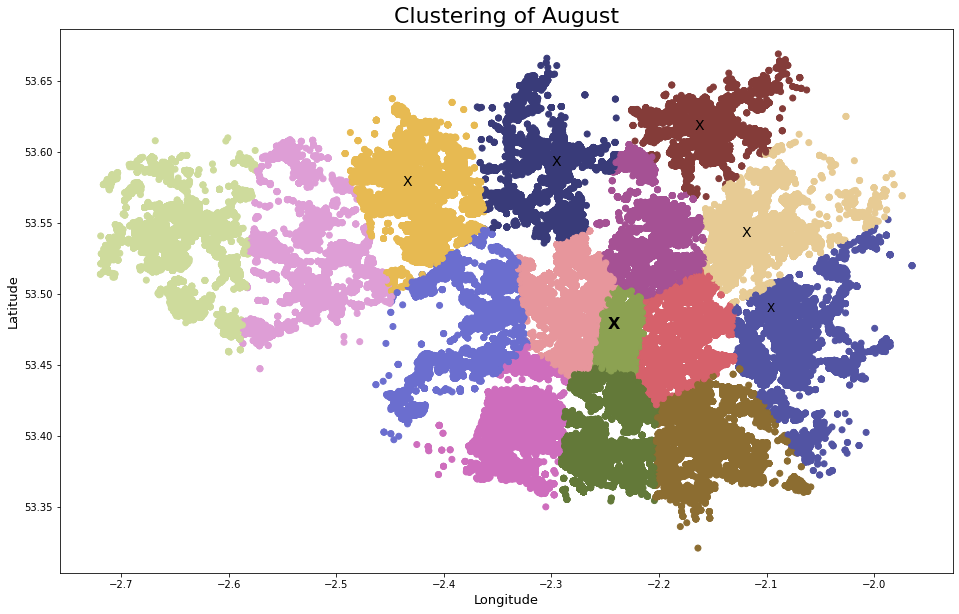

In [27]:
# plotting August clusters
fig, ax = plt.subplots()
ax.scatter(x=august.Longitude, y=august.Latitude, c=augLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of August', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of August.png')

plt.show()


## September

In [28]:
print('The following holds for September')
hotspot = main_hotspot_grid(sep_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(sep_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(sep_loc)/len(hotspot))}')

The following holds for September
There are roughly 18548 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 183595 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 10


In [32]:
clf_sep = KMeansConstrained(
     n_clusters=15,
     size_min=None,
     size_max=18548,
     random_state=15,
     n_jobs=-1
)
clf_sep.fit_predict(sep_array)

array([ 7,  1, 10, ...,  2, 11,  0])

In [33]:
sep_labels = clf_sep.labels_
sep_centers = clf_sep.cluster_centers_
np.save("sep_lbls.npy", sep_labels)
np.save("sep_cnts.npy", sep_centers)

In [34]:
sepLabels = np.load("sep_lbls.npy")

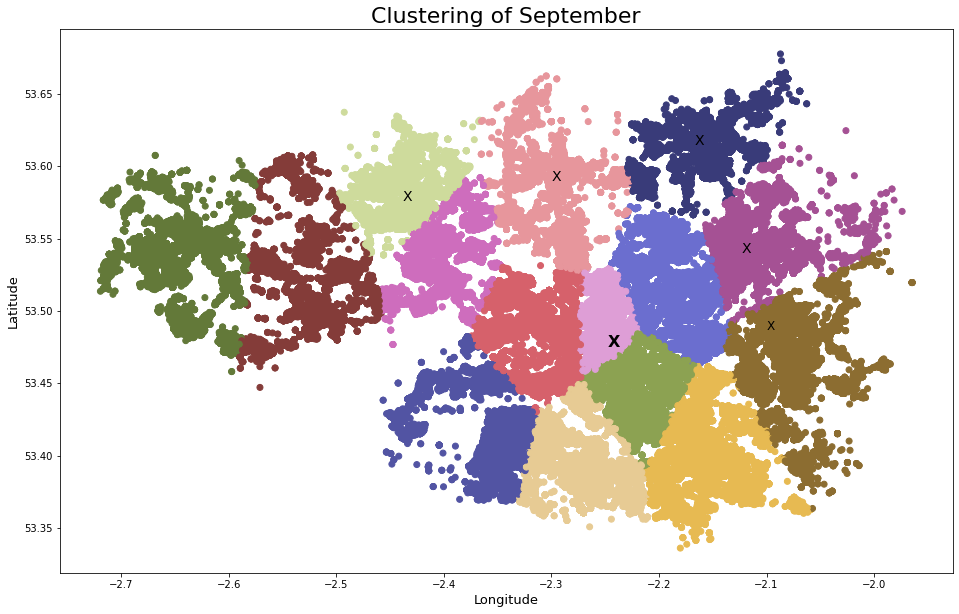

In [35]:
# plotting August clusters
fig, ax = plt.subplots()
ax.scatter(x=september.Longitude, y=september.Latitude, c=sepLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of September', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of September.png')

plt.show()


## October

In [36]:
print('The following holds for October')
hotspot = main_hotspot_grid(oct_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(oct_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(oct_loc)/len(hotspot))}')

The following holds for October
There are roughly 20328 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 198048 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 10


In [53]:
clf_oct = KMeansConstrained(
     n_clusters=16,
     size_min=None,
     size_max=20328,
     random_state=15,
     n_jobs=-1
)
clf_oct.fit_predict(oct_array)

array([ 2,  5, 12, ..., 11,  4, 14])

In [54]:
oct_labels = clf_oct.labels_
oct_centers = clf_oct.cluster_centers_
np.save("oct_lbls.npy", oct_labels)
np.save("oct_cnts.npy", oct_centers)

In [55]:
octLabels = np.load("oct_lbls.npy")

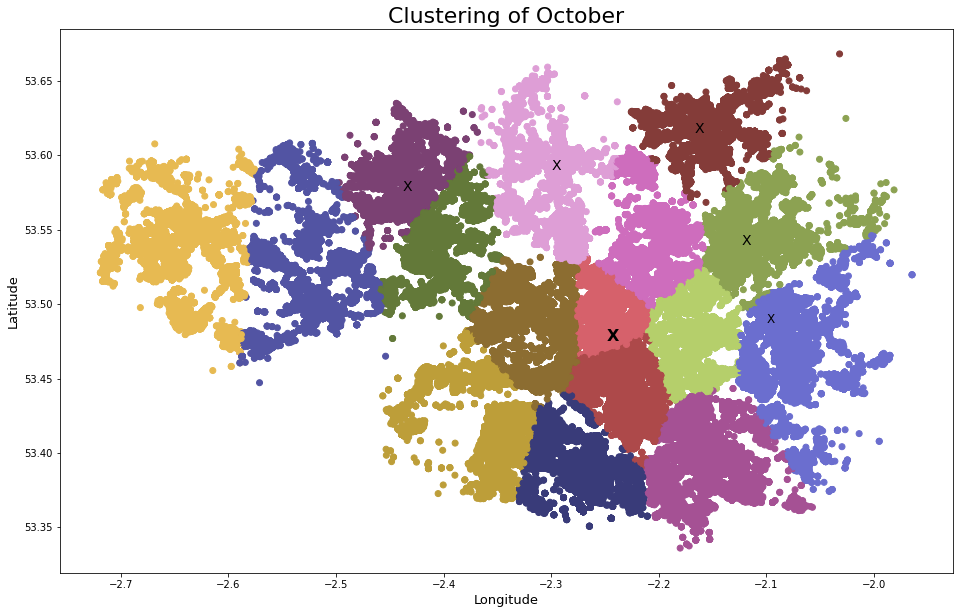

In [56]:
# plotting August clusters
fig, ax = plt.subplots()
ax.scatter(x=october.Longitude, y=october.Latitude, c=octLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of October', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of October.png')

plt.show()


## November

In [41]:
print('The following holds for November')
hotspot = main_hotspot_grid(nov_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(nov_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(nov_loc)/len(hotspot))}')

The following holds for November
There are roughly 20097 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 185244 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 10


In [42]:
clf_nov = KMeansConstrained(
     n_clusters=15,
     size_min=None,
     size_max=20097,
     random_state=15,
     n_jobs=-1
)
clf_nov.fit_predict(nov_array)

array([10,  3,  8, ..., 13, 13, 14])

In [45]:
nov_labels = clf_nov.labels_
nov_centers = clf_nov.cluster_centers_
np.save("nov_lbls.npy", nov_labels)
np.save("nov_cnts.npy", nov_centers)

In [46]:
novLabels = np.load("nov_lbls.npy")

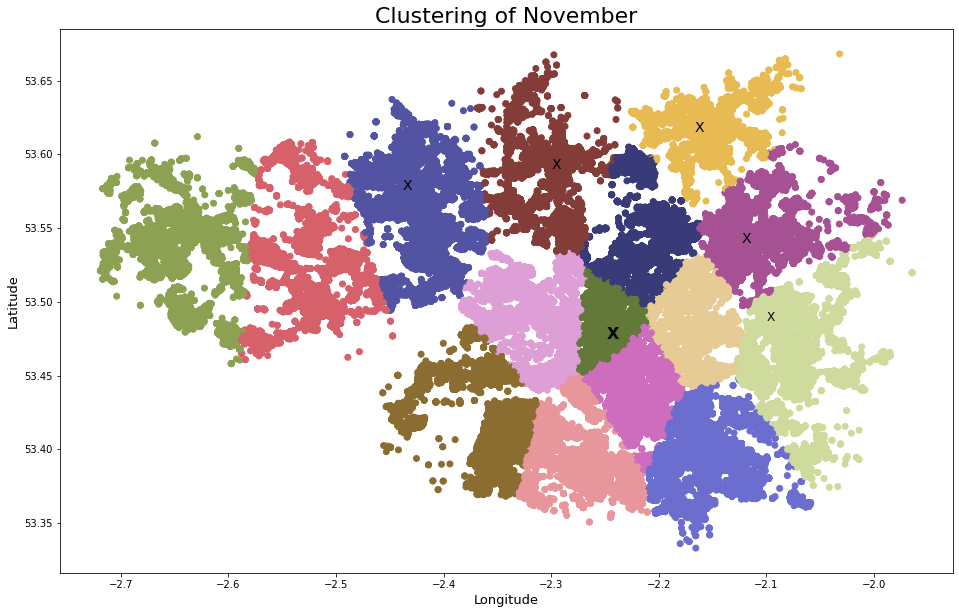

In [47]:
# plotting August clusters
fig, ax = plt.subplots()
ax.scatter(x=november.Longitude, y=november.Latitude, c=novLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of November', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of November.png')

plt.show()


## December

In [48]:
print('The following holds for December')
hotspot = main_hotspot_grid(dec_loc)
print(f'There are roughly {len(hotspot)} data points in the main hotspot, suggesting an esmitation for the max cluster size')
print(f'There is a total of {len(dec_loc)} data points in the spring data set')
print(f'The minimum number of clusters from this simple calculation would be: {math.ceil(len(dec_loc)/len(hotspot))}')

The following holds for December
There are roughly 21377 data points in the main hotspot, suggesting an esmitation for the max cluster size
There is a total of 194223 data points in the spring data set
The minimum number of clusters from this simple calculation would be: 10


In [49]:
clf_dec = KMeansConstrained(
     n_clusters=15,
     size_min=None,
     size_max=21377,
     random_state=15,
     n_jobs=-1
)
clf_dec.fit_predict(dec_array)

array([4, 9, 9, ..., 1, 7, 8])

In [50]:
dec_labels = clf_dec.labels_
dec_centers = clf_dec.cluster_centers_
np.save("dec_lbls.npy", dec_labels)
np.save("dec_cnts.npy", dec_centers)

In [51]:
decLabels = np.load("dec_lbls.npy")

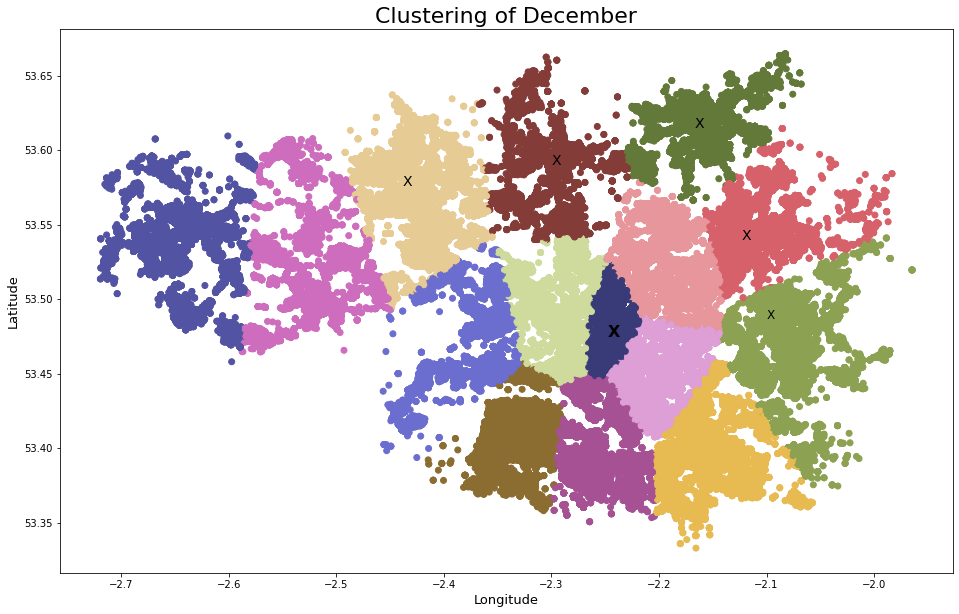

In [52]:
# plotting August clusters
fig, ax = plt.subplots()
ax.scatter(x=december.Longitude, y=december.Latitude, c=decLabels, cmap="tab20b")
# using_datashader(ax, spring.Longitude, spring.Latitude, c=springLabels)
fig.set_size_inches(16, 10)

plt.text(-2.248, 53.475, "X", size=16, weight='bold')
plt.text(-2.167, 53.615, "X", size=14)
plt.text(-2.123, 53.54, "X", size=14)
plt.text(-2.3, 53.59, "X", size=14)
plt.text(-2.438, 53.576, "X", size=14)
plt.text(-2.1, 53.487, "X", size=12)
plt.title('Clustering of December', size=22)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude', size=13)

plt.savefig('Clustering of December.png')

plt.show()
